#July 9 Riddler Express https://fivethirtyeight.com/features/can-you-solve-this-astronomical-enigma/

In [1]:
from math import gcd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
def years(num1, num2):
    #num1 will always be bigger than num2 due to the way I setup relative_prime()
    sum1 = 0
    sum2 = 0
    while abs(sum1-sum2) != 1:
        if sum1 <= sum2:
            sum1 += num1
        else:
            sum2 += num2
    return [num1, num2, max(sum1, sum2)]


def relative_prime_cicadas():
    ans = []
    for i in range(21):
        for j in range(1, i):
            if gcd(i, j) == 1:
                ans.append(years(i, j))
    return ans


list = relative_prime_cicadas()

In [3]:
df1 = pd.DataFrame(list, columns = ['num1', 'num2', 'years'])
# df2 = pd.DataFrame(list, columns = ['num2', 'num1', 'years'])
# df2 = df2[['num1', 'num2', 'years']]
# df_main = pd.concat([df1, df2])
# df_main.info()

In [4]:
df1.pivot_table(index='num2', columns='num1', values='years', fill_value = '')

num1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
num2,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
2,,3.0,,5.0,,7.0,,9.0,,11.0,,13.0,,15.0,,17.0,,19.0,
3,,,4.0,6.0,,7.0,9.0,,10.0,12.0,,13.0,15.0,,16.0,18.0,,19.0,21.0
4,,,,5.0,,8.0,,9.0,,12.0,,13.0,,16.0,,17.0,,20.0,
5,,,,,6.0,15.0,16.0,10.0,,11.0,25.0,26.0,15.0,,16.0,35.0,36.0,20.0,
6,,,,,,7.0,,,,12.0,,13.0,,,,18.0,,19.0,
7,,,,,,,8.0,28.0,21.0,22.0,36.0,14.0,,15.0,49.0,35.0,36.0,57.0,21.0
8,,,,,,,,9.0,,33.0,,40.0,,16.0,,17.0,,57.0,
9,,,,,,,,,10.0,45.0,,27.0,28.0,,64.0,18.0,,19.0,81.0


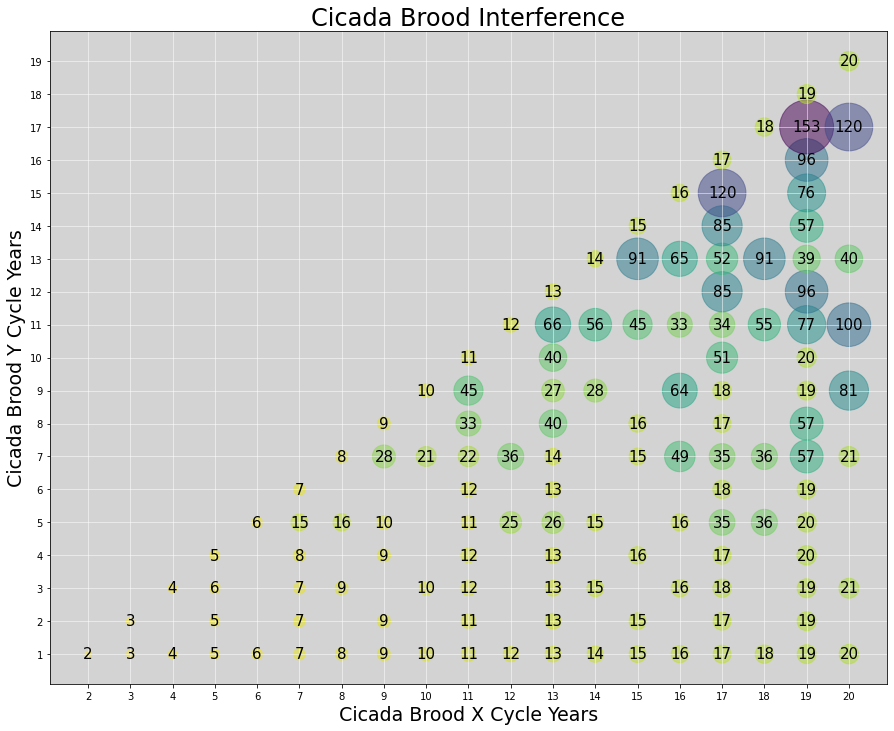

In [5]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot()
plt.scatter(df1["num1"], df1["num2"], c = df1["years"], s = 19*df1["years"], alpha = 0.5, cmap='viridis_r')
for i in range(len(df1)):
    plt.text(df1['num1'][i], df1['num2'][i], df1['years'][i], ha = 'center', va = 'center', size = 15)
plt.title('Cicada Brood Interference', fontsize = 24)

plt.xlabel('Cicada Brood X Cycle Years', fontsize = 19)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'x', linewidth = 1, color = 'white', alpha = 0.5)

plt.ylabel('Cicada Brood Y Cycle Years', fontsize = 19)
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.grid(which = 'major', axis = 'y', linewidth = 1, color = 'white', alpha = 0.5)

ax.set_facecolor('lightgrey')